<a href="https://colab.research.google.com/github/hufexv/Basic_python_code/blob/main/Computer_Vision_CV_3_Picture_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

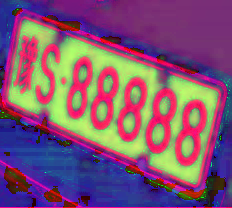

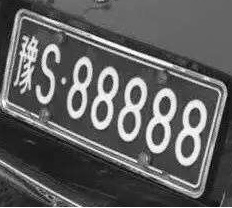

In [ ]:
#HSV Hue:色调 Saturation:饱和度 Value:明亮度
img = cv.imread('car.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hsv[:,:,0]
cv2_imshow(hsv)
cv2_imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY))

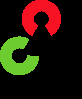

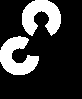

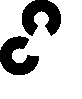

In [ ]:
#select
img = cv.imread('opencv.png')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#红色区域
lower_red = np.array([150, 50, 50])
upper_red = np.array([200, 255, 255])
#绿色区域
lower_green = np.array([30, 50, 50])
upper_green = np.array([80, 255, 255])

mask1 = cv.inRange(hsv, lower_red, upper_red)
mask2 = cv.inRange(hsv, lower_green, upper_green)
mask = cv.add(mask1, mask2)
mask0 = cv.bitwise_not(mask)

dest = cv.bitwise_and(img, img, mask=mask)
cv2_imshow(dest)
cv2_imshow(mask)
cv2_imshow(mask0)

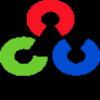

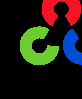

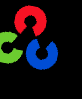

[[ 0.46984631 -0.17101007 33.25402057]
 [ 0.17101007  0.46984631 13.27130273]]


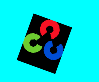

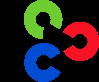

In [ ]:
#enlarge
cv2_imshow(cv.resize(img, (100, 100)))
#move
cv2_imshow(cv.warpAffine(img, np.float32([[1, 0, 20], [0, 1, -10]]), (img.shape[1], img.shape[0])))
cv2_imshow(cv.warpAffine(img, np.float32([[0.8, -0.15, 0], [0.15, 0.8, 0]]), (img.shape[1], img.shape[0])))

#rotation
cols, rows = img.shape[:2]
M = cv.getRotationMatrix2D(center=(cols/2, rows/2), angle=-20, scale=0.5)
print(M)
dest1 = cv.warpAffine(img, M, (cols, rows), borderValue=(255,255,0))
cv2_imshow(dest1)
dest2 = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
cv2_imshow(dest2)

#flip
dest3 = cv.flip(img, 1)
cv2_imshow(dest3)

In [ ]:
#rotate and flip(array)
img_arr = np.arange(9).reshape(3, 3)
print(cv.rotate(img_arr, cv.ROTATE_90_COUNTERCLOCKWISE), '\n')
print(cv.flip(img_arr, 0))

[[2 5 8]
 [1 4 7]
 [0 3 6]] 

[[6 7 8]
 [3 4 5]
 [0 1 2]]


[[  1.30434783  -0.05671078 -19.56521739]
 [  0.           1.           0.        ]]


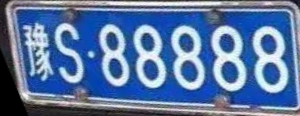

In [ ]:
#rotate car_plat
img = cv.imread('car.jpg')
h, w = img.shape[:2]

M = cv.getRotationMatrix2D(center=(0,0), angle=20, scale=1)
dest1 = cv.warpAffine(img, M, (w+30, w//2), borderValue=[0,0,0])
h, w = dest1.shape[:2]
point1 = np.float32([[15,0], [245,0], [250,115]])
point2 = np.float32([[0,0], [300,0], [300,115]])
M = cv.getAffineTransform(point1, point2)
print(M)
dest = cv.warpAffine(dest1, M, (300,h))

cv2_imshow(dest)



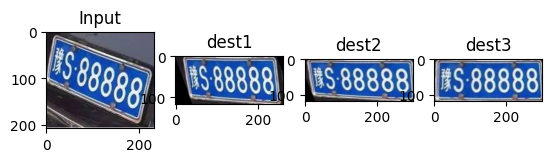

In [ ]:
#旋转，仿射，透视
img = cv.imread('car.jpg')
h, w = img.shape[:2]
#Rotation
M = cv.getRotationMatrix2D(center=(0,0), angle=20, scale=1)
dest1 = cv.warpAffine(img, M, (w+30, w//2), borderValue=(0,0,0))
h, w = dest1.shape[:2]
#Affine
p1 = np.float32([[15,0], [245,0], [250,115]])
p2 = np.float32([[0,0], [300,0], [300,115]])
M = cv.getAffineTransform(p1, p2)
dest2 = cv.warpAffine(dest1, M, (300,h))
#Perspective
p1 = np.float32([[15,0],[245,0],[250,115],[34,100]])
p2 = np.float32([[0,0],[300,0],[300,115],[0,115]])
M = cv.getPerspectiveTransform(p1, p2)
dest3 = cv.warpPerspective(dest1, M, (300,h))


plt.subplot(141)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Input')
plt.subplot(142)
plt.imshow(cv.cvtColor(dest1, cv.COLOR_BGR2RGB))
plt.title('dest1')
plt.subplot(143)
plt.imshow(cv.cvtColor(dest2, cv.COLOR_BGR2RGB))
plt.title('dest2')
plt.subplot(144)
plt.imshow(cv.cvtColor(dest3, cv.COLOR_BGR2RGB))
plt.title('dest3')

plt.show()

(256, 256)


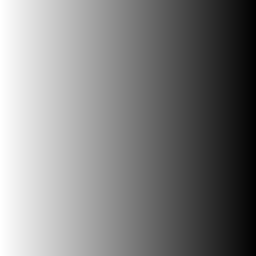

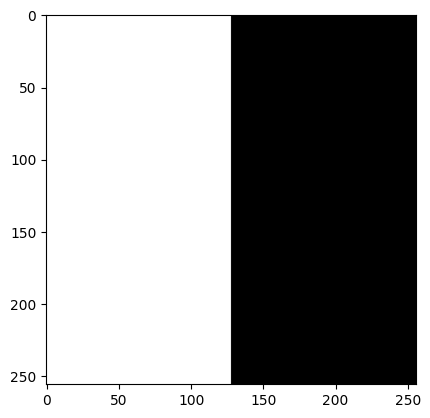

In [ ]:
#Binary
img = np.arange(255, -1, -1).reshape((1,-1))
for i in range(255):
  img = np.append(img, np.arange(255, -1, -1).reshape((1,-1)), axis=0)
img = img.astype(np.uint8)
print(img.shape)
cv2_imshow(img)

ret, thresh = cv.threshold(src=img, thresh=127, maxval=255, type=cv.THRESH_BINARY)
plt.subplot()
plt.imshow(thresh/255.0, 'gray')
plt.show()

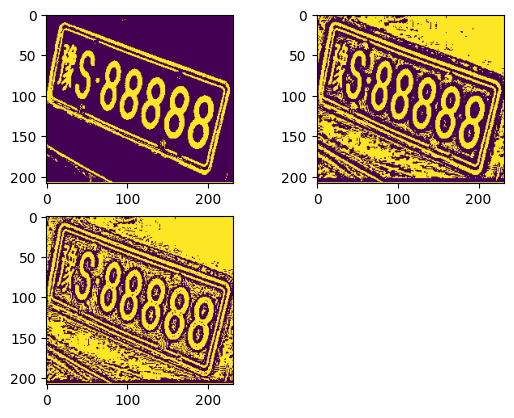

In [ ]:
#adaptive_thresh
img = cv.imread('car.jpg', 0)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
#means_threshold
th2 = cv.adaptiveThreshold(img, maxValue=255, adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C, thresholdType=cv.THRESH_BINARY, blockSize=11, C=2)
#Gaussian_threshold
th3 = cv.adaptiveThreshold(img, maxValue=255, adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv.THRESH_BINARY, blockSize=11, C=2)

imgs = [th1,th2,th3]
for i in range(3):
  plt.subplot(2,2,i+1)
  plt.imshow(imgs[i])
plt.show()

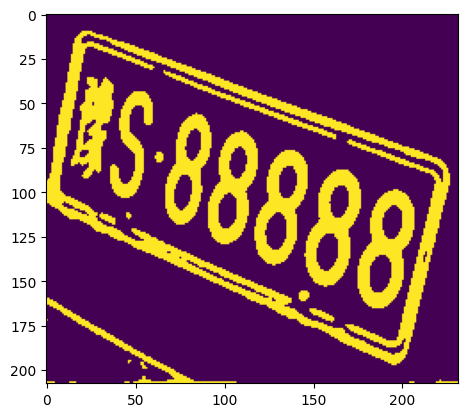

In [ ]:
#Gaussian_Smoothing(filter)

ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
#高斯模糊+普通二值化+大津法二值化 = 高斯平滑
blur = cv.GaussianBlur(img, (5,5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.imshow(th3)
plt.show()

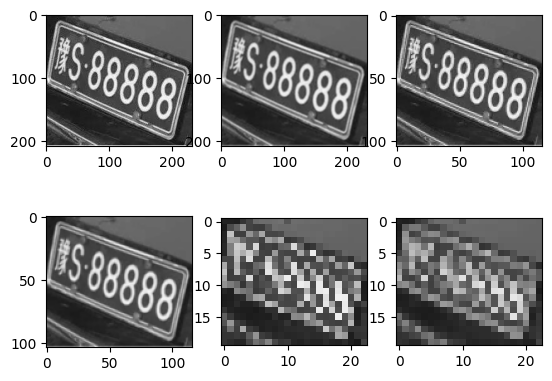

In [ ]:
#Convoltion
kernel = np.ones((3,3), np.float32) / 9
img2 = cv.filter2D(img, -1, kernel)

h,w = img.shape[:2]
w = int(w*0.5)
h = int(h*0.5)
img3 = cv.resize(img, (w,h))
img4 = cv.resize(img2, (w,h))
w = int(w*0.2)
h = int(h*0.2)
img5 = cv.resize(img3, (w,h))
img6 = cv.resize(cv.filter2D(img4, -1, kernel), (w,h))

plt.subplot(231)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(232)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.subplot(233)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.subplot(234)
plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
plt.subplot(235)
plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))
plt.subplot(236)
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))
plt.show()

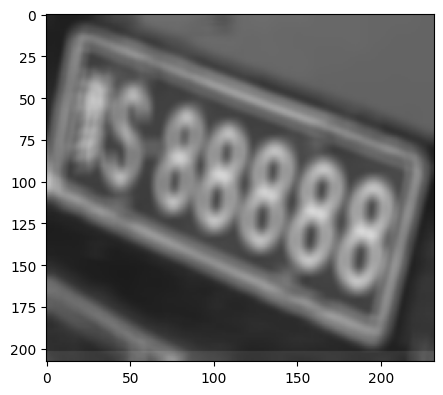

[[0.05448868]
 [0.24420134]
 [0.40261995]
 [0.24420134]
 [0.05448868]]
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


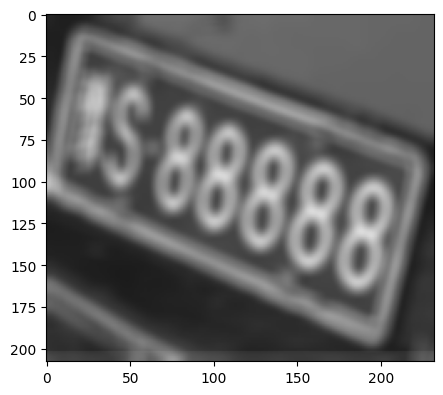

In [ ]:
#averaging_filter
dest = cv.blur(img, ksize=(11,11))
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(dest, cv.COLOR_BGR2RGB))
plt.show()

#gaussian_filter
a = cv.getGaussianKernel(5,1,ktype=cv.CV_64F)
print(a)
kernel = np.dot(a, a.T)
print(kernel)
dest2 = cv.GaussianBlur(img, ksize=(11,11), sigmaX=5.0, sigmaY=5.0)
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(dest2, cv.COLOR_BGR2RGB))
plt.show()

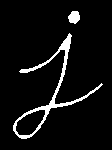

In [ ]:
#erode
img = cv.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
dest = cv.erode(img, kernel, iterations=1, borderType=cv.BORDER_REFLECT)
cv2_imshow(dest)

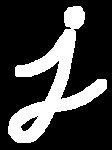

In [ ]:
#dilate(expand)
img = cv.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
dest = cv.dilate(img, kernel, iterations=1)
cv2_imshow(dest)

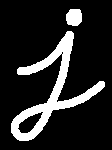

In [ ]:
#open(erode+dilate)
img = cv.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
dest = cv.morphologyEx(img, op=cv.MORPH_OPEN, kernel=kernel, iterations=1)
cv2_imshow(dest)

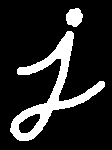

In [ ]:
#close(dilate+erode)
img = cv.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
dest = cv.morphologyEx(img, op=cv.MORPH_CLOSE, kernel=kernel, iterations=1)
cv2_imshow(dest)

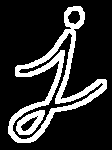

In [ ]:
#Morphological_gradient
img = cv.imread('j.png', 0)
kernel = np.ones((5,5), np.uint8)
dest = cv.morphologyEx(img, op=cv.MORPH_GRADIENT, kernel=kernel, iterations=1)
cv2_imshow(dest)

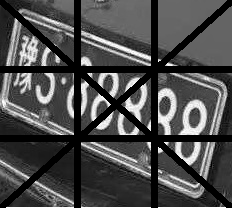

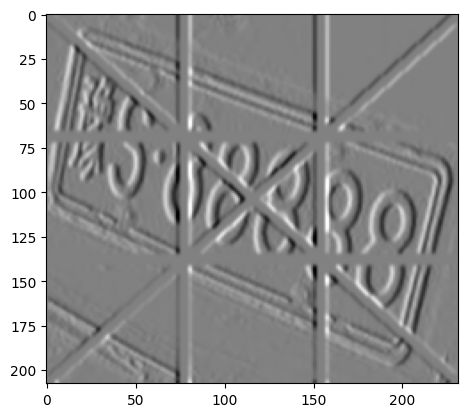

In [ ]:
#Sobel filter(gaussian_smooth_with_gradient)
img = cv.imread('car.jpg', 0)
rows, cols = img.shape[:2]
cv.line(img, pt1=(0,rows//3), pt2=(cols,rows//3), color=0, thickness=5)
cv.line(img, pt1=(0,2*rows//3), pt2=(cols,2*rows//3), color=0, thickness=5)
cv.line(img, pt1=(cols//3,0), pt2=(cols//3,rows), color=0, thickness=5)
cv.line(img, pt1=(2*cols//3,0), pt2=(2*cols//3,rows), color=0, thickness=5)
cv.line(img, pt1=(0,0), pt2=(cols,rows), color=0, thickness=5)
cv.line(img, pt1=(0,rows), pt2=(cols,0), color=0, thickness=5)
cv2_imshow(img)

sobelx = cv.Sobel(img, ddepth=6, dx=1, dy=0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=5)
sobelx2 = cv.Sobel(img, cv.CV_64F, dx=2, dy=0, ksize=5)
sobely2 = cv.Sobel(img, cv.CV_64F, dx=0, dy=2, ksize=5)
sobel = cv.Sobel(img, cv.CV_64F, dx=1, dy=1, ksize=5)
sobelx_y = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=5)
sobely_x = cv.Sobel(img, cv.CV_64F, dx=1, dy=0, ksize=5)

plt.figure()
plt.imshow(sobelx, 'gray')

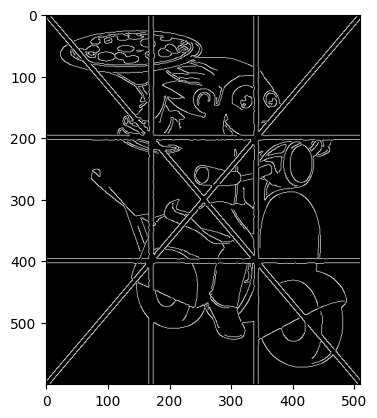

In [ ]:
#canny edge_detect
img = cv.imread('person.png', 0)
rows, cols = img.shape[:2]
cv.line(img, pt1=(cols//3, rows), pt2=(cols//3, 0), color=0, thickness=5)
cv.line(img, pt1=(2*cols//3, rows), pt2=(2*cols//3, 0), color=0, thickness=5)
cv.line(img, pt1=(0, rows//3), pt2=(cols, rows//3), color=0, thickness=5)
cv.line(img, pt1=(0, 2*rows//3), pt2=(cols, 2*rows//3), color=0, thickness=5)
cv.line(img, pt1=(cols, rows), pt2=(0, 0), color=0, thickness=5)
cv.line(img, pt1=(0, rows), pt2=(cols, 0), color=0, thickness=5)
#cv2_imshow(img)
#gaussian blur
blur = cv.GaussianBlur(img, (5,5), 0)
edges = cv.Canny(blur, threshold1=50, threshold2=250)

plt.figure()
plt.imshow(edges, 'gray')
plt.show()


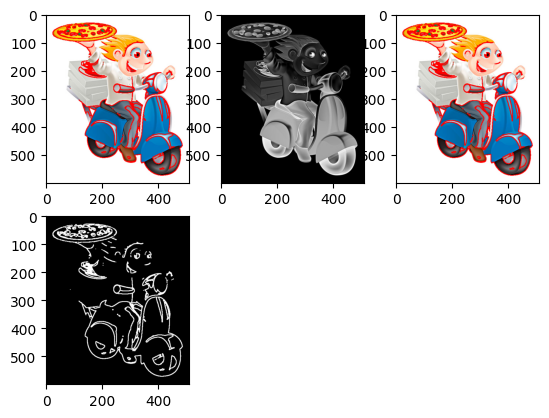

In [ ]:
#contour to edge
img = cv.imread('person.png')
img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img1 = cv.bitwise_not(img1)
ret, thresh = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)
#get_contour_data
contour, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
img2 = cv.drawContours(img, contour, contourIdx=-1, color=(0,0,255),thickness=2)
img3 = np.zeros_like(img2)
cv.drawContours(img3, contour, contourIdx=-1, color=(255,255,255), thickness=2)

plt.subplot(231)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.subplot(232)
plt.imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB))
plt.subplot(233)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.subplot(234)
plt.imshow(img3, 'gray')
plt.show()

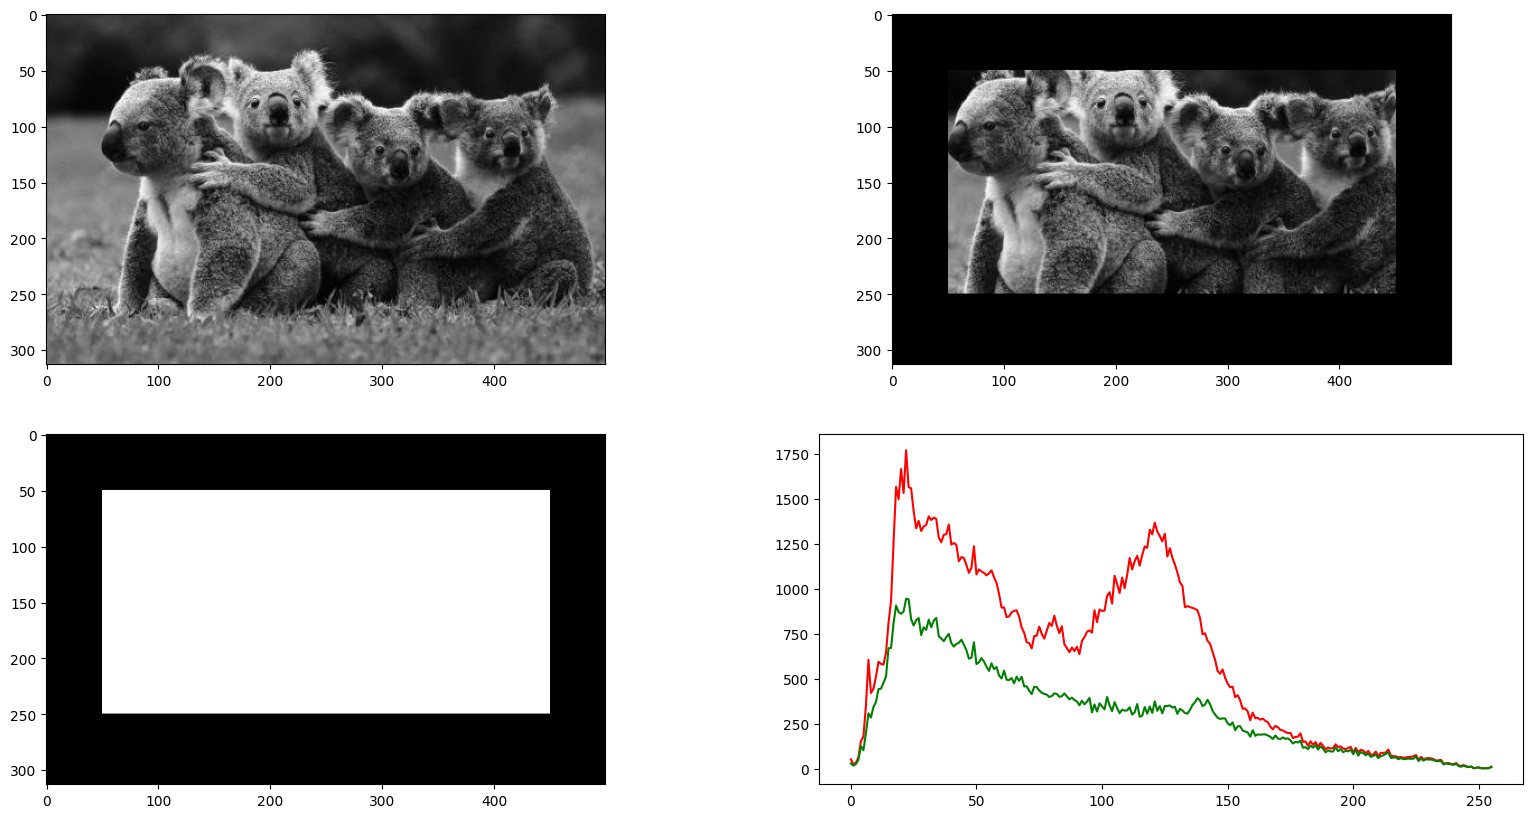

In [ ]:
#calcHist 直方图
img = cv.imread('cola.jpg', 0)
mask = np.zeros(img.shape[:2], np.uint8)
mask[50:250, 50:450] = 255
masked_img = cv.bitwise_and(img, img, mask=mask)
hist1 = cv.calcHist([img], [0], None, [256], [0,256])
hist2 = cv.calcHist([masked_img], [0], mask, [256], [0,256])

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(img, 'gray')
plt.subplot(222)
plt.imshow(masked_img, 'gray')
plt.subplot(223)
plt.imshow(mask, 'gray')
plt.subplot(224)
plt.plot(hist1, color='r')
plt.plot(hist2, color='g')
plt.show()